# **Netflix Recommandation Project**

The Netflix Dataset is the collection of information about movies available on netflix


# **Objective of Machine learning model**

"To achieve this, a Singular Value Decomposition (SVD) model is utilized to analyze and predict user preferences for recommending the top 5 movies."

# **Feature Description**

**Cust_Id** : refers to the customer ID of individuals who watched the movies

**Ratings** :  represents the ratings given by customers for the movies they watched.

## **Fetching Data:**

In [1]:
# importing the necessary libraries

# Mathematical Operation
import numpy as np

# Data Manipulation
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# **Importing the dataset**

In [3]:
netflix_data = pd.read_csv('/content/drive/MyDrive/Netflix project/combined_data_1.txt', header = None, usecols = [0, 1], names = ['Cust_ID', 'Ratings'] )
netflix_data

,Cust_ID,Ratings
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [4]:
# How many total movies are there in the given data

movie_cnt = netflix_data.isna().sum().sum()
print(f"There are in total '{movie_cnt}' movie\'s present")

There are in total '4499' movie's present


In [5]:
# How many unique customers are there

cust_cnt = netflix_data['Cust_ID'].nunique() - movie_cnt
print(f"There are in total '{cust_cnt}' unique customer\'s present")

There are in total '470758' unique customer's present


In [6]:
# How many total rating are there

rating_cnt = netflix_data['Ratings'].value_counts().sum()
print(f"There are in total '{rating_cnt}' rating present")

There are in total '24053764' rating present


In [7]:
# The below code tells abt, replacing colon with space which is movie

movie_id = None
movie_np = []

for col in netflix_data['Cust_ID']:
  if ':' in col:
    movie_id = int(col.replace(':',''))
  movie_np.append(movie_id)

In [8]:
netflix_data['movie_ID'] = movie_np

In [9]:
# Dropping the null value

netflix_data.dropna(inplace=True)

In [10]:
netflix_data

,Cust_ID,Ratings,movie_ID
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [11]:
netflix_data.dtypes

,0
Cust_ID,object
Ratings,float64
movie_ID,int64


In [12]:
# Changing the datatype of customer id

netflix_data['Cust_ID'] = netflix_data['Cust_ID'].astype(int)

# **Statistical analysis of Data**

In [13]:
netflix_data.describe()

,Cust_ID,Ratings,movie_ID
count,2.405376e+07,2.405376e+07,2.405376e+07
mean,1.322285e+06,3.599634e+00,2.308324e+03
std,7.645779e+05,1.086118e+00,1.303909e+03
min,6.000000e+00,1.000000e+00,1.000000e+00
25%,6.609270e+05,3.000000e+00,1.180000e+03
50%,1.318602e+06,4.000000e+00,2.342000e+03
75%,1.984358e+06,4.000000e+00,3.433000e+03
max,2.649429e+06,5.000000e+00,4.499000e+03


* The Count of Customer, Ratings and Movies are almost same.
* **Average Customers**: 1,322,285 customers watched a movie on average.
* **Minimum Customers**: 6 customers watched the least-attended movie.
* **Maximum Customers**: 2,649,429 customers watched the most-attended movie





## **Observations:**
There is a significant range between the minimum and maximum attendance (2,649,429 - 6) = 2,649,423.

# **Exploratory Data Analysis**

### To find the distribution of different ratings in the dataset

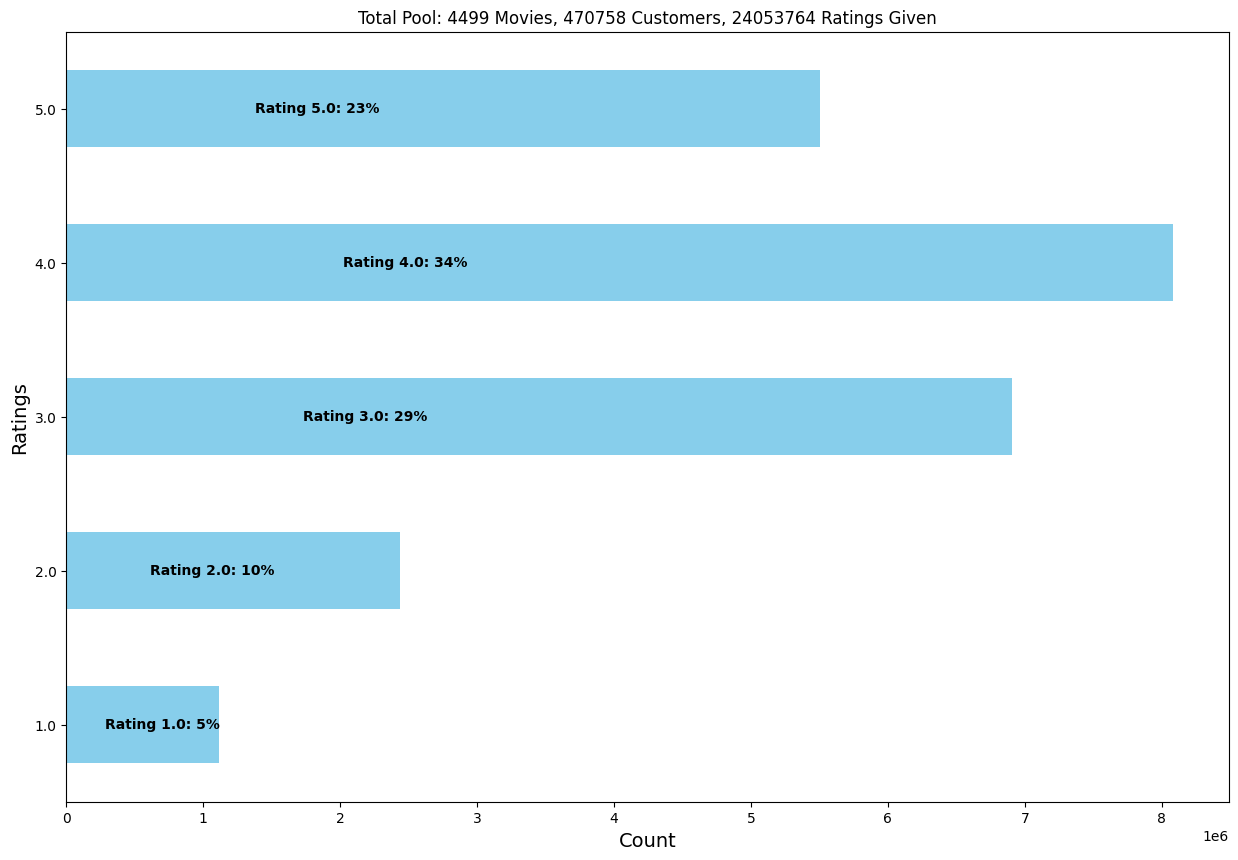

In [14]:

p = netflix_data.groupby('Ratings')['Ratings'].agg(['count'])

# Plotting the data as a horizontal bar chart
ax = p.plot(kind='barh', legend=False, figsize=(15, 10), color='skyblue')
plt.title(f'Total Pool: {movie_cnt} Movies, {cust_cnt} Customers, {rating_cnt} Ratings Given')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Ratings', fontsize=14)

# Adding text annotations

for i in range(len(p)):
    plt.text(
        p.iloc[i][0] / 4,
        i,
        f'Rating {p.index[i]}: {p.iloc[i][0] * 100 / p.sum()[0]:.0f}%',
        color='black',
        weight='bold',
        va='center'
    )

plt.show()


## **Observation**

* 23% of movies are rated 5.0, indicating these are the highest-rated movies and are likely the most appreciated by viewers.

* 34% of movies have a rating of 4.0, which represents a significant portion of the dataset, showcasing movies that are well-received but not at the very top.

* 29% of movies are rated 3.0, reflecting a substantial number of average-rated movies, potentially appealing to a mixed audience.

* 10% of movies have a rating of 2.0, indicating these movies are below average and may not be as popular among viewers.

* 5% of movies are rated 1.0, suggesting they are the least liked or appreciated by users in the dataset.

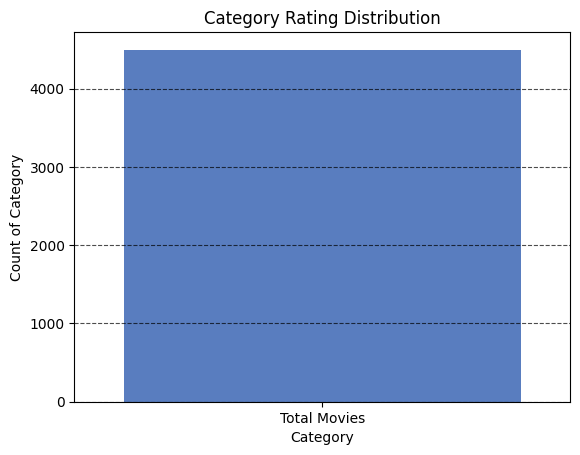

In [15]:
movie_data = pd.DataFrame({'Category':['Total Movies'], 'Count':[movie_cnt]})

sns.barplot( x ='Category', y = 'Count', data = movie_data, palette='muted')

plt.title('Category Rating Distribution')
plt.xlabel('Category')
plt.ylabel('Count of Category')
plt.grid(True, axis='y', linestyle='--', alpha=0.7,color='black')
plt.show()

## **Observation**

* The bar plot reveals that there are more than 4,000 movies in the dataset, showcasing a diverse collection of films rated by users

## Customer Count

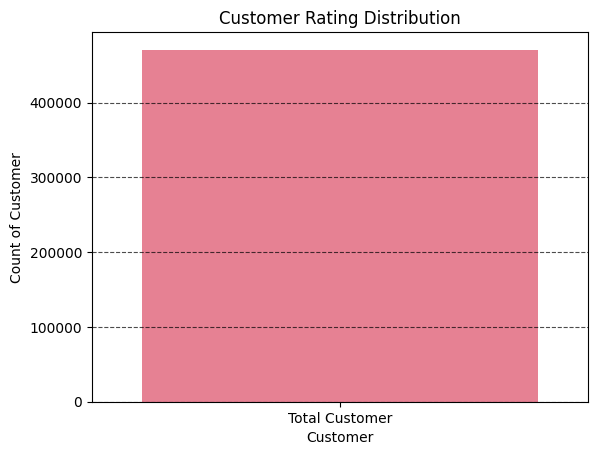

In [16]:
Customer_data = pd.DataFrame({'Customers':['Total Customer'],'Count':[cust_cnt]})

sns.barplot( x ='Customers', y = 'Count', data = Customer_data, palette='husl')

plt.title('Customer Rating Distribution')
plt.xlabel('Customer')
plt.ylabel('Count of Customer')
plt.grid(True, axis='y', linestyle='--', alpha=0.7,color='black')
plt.show()


## **Observation**

* The bar plot shows that there are over 450,000 customers who have watched movies. This indicates a large and diverse user base, providing valuable data on viewing habits and preferences for analysis and recommendations.

## Rating Count

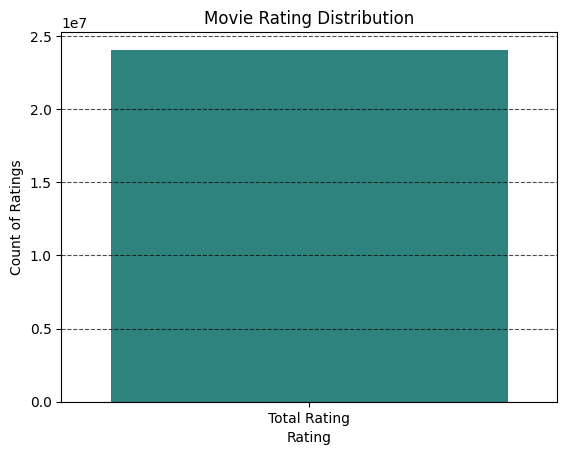

In [17]:
Rating_data = pd.DataFrame({'Ratings':['Total Rating'],'Count':[rating_cnt]})

sns.barplot( x ='Ratings', y = 'Count', data = Rating_data, palette='viridis')

plt.title('Movie Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count of Ratings')
plt.grid(True, axis='y', linestyle='--', alpha=0.7,color='black')
plt.show()


## **Observation**

* The bar graph indicates that there are over 2 crore (20 million) rating counts in the dataset. This reflects a substantial level of user engagement, providing rich data for analyzing movie popularity and user preferences.

## **Pre-Filtering Manually**
#### **Condition 1** -Retain customers with higher movie-watching counts (more ratings or experiences) and exclude those with lower movie-watching counts.



In [18]:
data_movie_summary = netflix_data.groupby('movie_ID')['Ratings'].count()
data_movie_summary.head()

,Ratings
movie_ID,
1,547
2,145
3,2012
4,142
5,1140


In [19]:
# Setting up the percentage benchmark

movie_benchmark = round(data_movie_summary.quantile(0.60))

print(f'The customer rated the movie with a minimum rating score of {movie_benchmark}.')

The customer rated the movie with a minimum rating score of 908.


In [20]:
# List of all the rejected movies who is not cross the benchmark

rejected_movies = data_movie_summary[data_movie_summary < movie_benchmark].index

# print(f'Rejected Movies  \n\n{rejected_movies}')

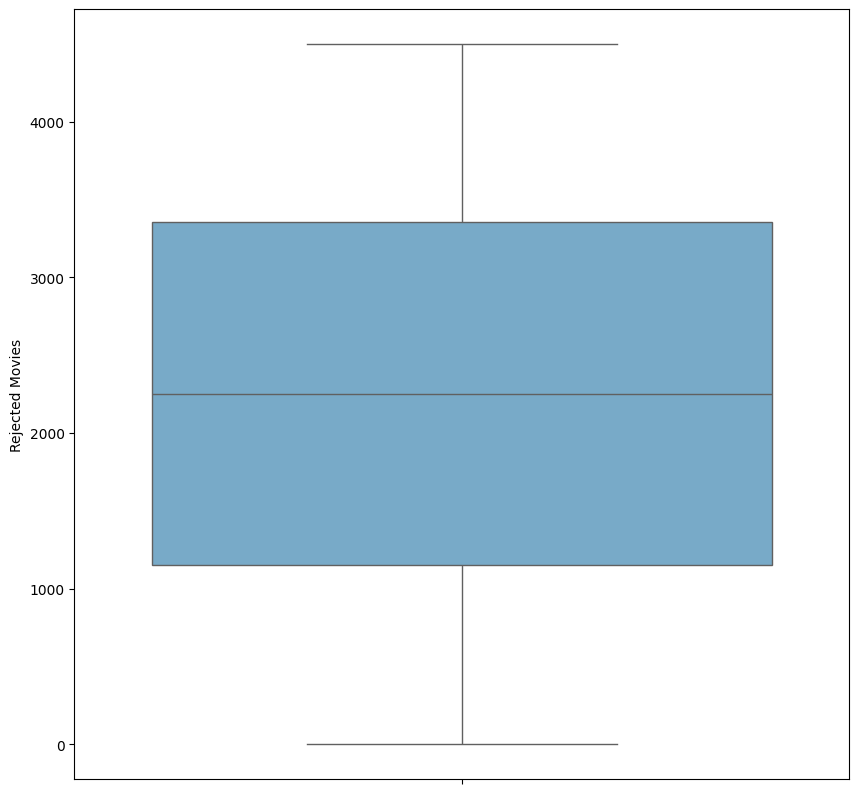

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(rejected_movies, palette='Blues')
plt.ylabel('Rejected Movies')
plt.show()

#### **Condition 2** - Filter out movies that have been rated by fewer customers.

In [22]:
data_cust_summary = netflix_data.groupby('Cust_ID')['Ratings'].count()

data_cust_summary.head()

,Ratings
Cust_ID,
6,153
7,195
8,21
10,49
25,4


In [23]:
# Setting up the customer benchmark

cust_benchmark = round(data_cust_summary.quantile(0.6))

print(f'The customer should have rated at least {cust_benchmark} movies.')

The customer should have rated at least 36 movies.


In [24]:
# List of all the rejected cust who is not cross the benchmark

rejected_cust = data_cust_summary[data_cust_summary<cust_benchmark].index

# print(f'Rejected customer : \n\n{rejected_cust}')

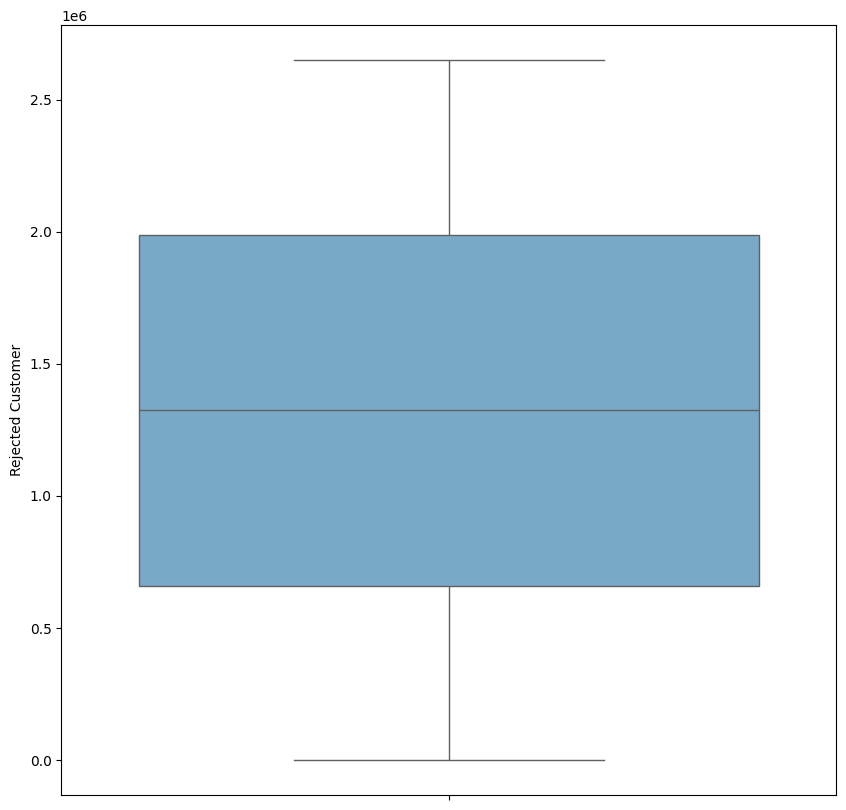

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(rejected_cust, palette='Blues')
plt.ylabel('Rejected Customer')
plt.show()

In [26]:
# Removing the rejected movies

netflix_data = netflix_data[~netflix_data['Cust_ID'].isin(rejected_cust)]

In [27]:
# Removing the rejected  customer

netflix_data = netflix_data[~netflix_data['movie_ID'].isin(rejected_movies)]

In [28]:
netflix_data.head()

,Cust_ID,Ratings,movie_ID
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


## **"Importing the testing dataset, which will be used to generate recommendation predictions."**

In [29]:
data_title  = pd.read_csv('/content/drive/MyDrive/Netflix project/movie_titles.csv', encoding='ISO-8859-1', header=None, names=['Movie_ID', 'Year', 'Name'], usecols=[0, 1, 2])

In [ ]:
data_title.head(5)

,Movie_ID,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [31]:
# !pip  install surprise

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [33]:
reader = Reader()

In [34]:
# Converting the dataset into SVD readable format.

data = Dataset.load_from_df(netflix_data[['Cust_ID', 'movie_ID', 'Ratings']], reader)

In [35]:
model = SVD()

In [36]:
cross_validate(model, data, measures = ['RMSE'], cv = 3 )

{'test_rmse': array([0.86746842, 0.86797823, 0.86816341]),
 'fit_time': (335.52848863601685, 354.2094659805298, 345.9625952243805),
 'test_time': (137.39777493476868, 127.1086277961731, 108.5965588092804)}

### **"Recommending the top 5 movies based on preferences from 5 selected users."**

In [37]:
user_1331154 = data_title.copy()
user_44937 = data_title.copy()
user_2632461 = data_title.copy()
user_2031561 = data_title.copy()
user_439011 = data_title.copy()

In [38]:
user_1331154['Estimate_Score']  =   user_1331154['Movie_ID'].apply(lambda x : model.predict(1331154, x).est)

In [39]:
user_1331154 = user_1331154.sort_values('Estimate_Score', ascending=False)

In [ ]:
user_1331154.head()

,Movie_ID,Year,Name,Estimate_Score
269,270,2001.0,Sex and the City: Season 4,4.567168
137,138,1995.0,Star Trek: Voyager: Season 1,4.566416
222,223,2003.0,Chappelle's Show: Season 1,4.486201
166,167,2004.0,The Chorus,4.364484
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.338180


In [40]:
user_44937['Estimate_Score'] = user_44937['Movie_ID'].apply(lambda x : model.predict(44937, x).est)

user_44937 = user_44937.sort_values('Estimate_Score', ascending=False)

user_44937.head()

,Movie_ID,Year,Name,Estimate_Score
4053,4054,1990.0,House of Cards Trilogy I: House of Cards,4.870465
470,471,1931.0,City Lights,4.766462
3022,3023,1973.0,Upstairs,4.736951
2753,2754,2002.0,The Life of Mammals,4.640509
2056,2057,2001.0,Buffy the Vampire Slayer: Season 6,4.614056


In [41]:
user_2632461['Estimate_Score'] = user_2632461['Movie_ID'].apply(lambda x : model.predict(2632461, x).est)

user_2632461 = user_2632461.sort_values('Estimate_Score', ascending=False)

user_2632461.head()

,Movie_ID,Year,Name,Estimate_Score
1019,1020,1989.0,The Simpsons: Season 1,4.571625
3289,3290,1974.0,The Godfather,4.497350
2101,2102,1994.0,The Simpsons: Season 6,4.463098
3455,3456,2004.0,Lost: Season 1,4.457660
2861,2862,1991.0,The Silence of the Lambs,4.454652


In [42]:
user_2031561['Estimate_Score'] = user_2031561['Movie_ID'].apply(lambda x : model.predict(2031561, x).est)

user_2031561 = user_2031561.sort_values('Estimate_Score', ascending=False)

user_2031561.head()

,Movie_ID,Year,Name,Estimate_Score
3899,3900,2000.0,Amores Perros,4.523782
2447,2448,1991.0,Prime Suspect 1,4.470906
4477,4478,1993.0,The War Room,4.390936
2802,2803,1995.0,Pride and Prejudice,4.380223
3445,3446,2002.0,Spirited Away,4.347976


In [43]:
user_439011['Estimate_Score'] = user_439011['Movie_ID'].apply(lambda x : model.predict(439011, x).est)

user_439011 = user_439011.sort_values('Estimate_Score', ascending=False)

user_439011.head()

,Movie_ID,Year,Name,Estimate_Score
2860,2861,1996.0,Babylon 5: Season 4,4.806248
2753,2754,2002.0,The Life of Mammals,4.767655
2802,2803,1995.0,Pride and Prejudice,4.720348
67,68,2004.0,Invader Zim,4.694733
3964,3965,1992.0,Red Dwarf: Series 5,4.690906


These five users, identified by their unique user IDs, have rated movies and made recommendations for you to watch. Each user’s movie ratings are stored in separate copies of the dataset:

**user_1331154** has suggested a list of movies based on their ratings.

**user_44937** has also rated movies, providing recommendations tailored to their preferences.

**user_2632461** offers a set of movie ratings, which can guide your choices.

**user_2031561** shares their movie ratings and recommendations.

**user_439011** has rated movies, suggesting films you might enjoy.

These recommendations are derived from their ratings and can help you explore movies they found noteworthy.